In [1]:
# reference
# https://www.youtube.com/watch?v=LfUsGv-ESbc&list=PL1v8zpldgH3o3007KRgX-HfNgWPHsIogL
# https://colab.research.google.com/github/facebookresearch/detr/blob/colab/notebooks/detr_demo.ipynb#scrollTo=Y6Jrz6xz71C0

In [2]:
import torch as t
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageFont
import requests

In [3]:
model = t.hub.load('facebookresearch/detr','detr_resnet101',pretrained=True)
model.eval()

Using cache found in C:\Users\zxl1731xx/.cache\torch\hub\facebookresearch_detr_master


DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): Linear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Drop

In [5]:
# use an arbitrary image from google
url = input()  # https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/dogs_1280p_0.jpg?itok=cnRk0HYq
requests.get(url, stream=True).raw

https://www.sciencemag.org/sites/default/files/styles/article_main_large/public/dogs_1280p_0.jpg?itok=cnRk0HYq


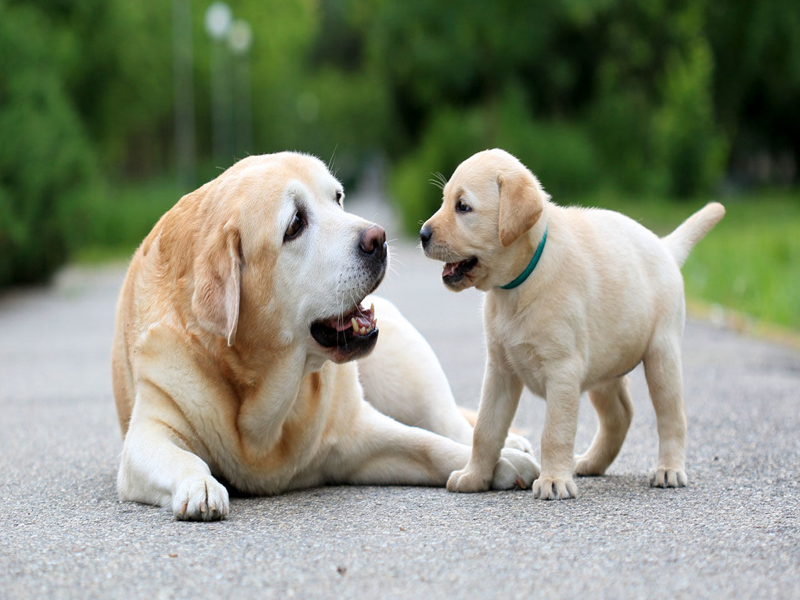

In [6]:
img = Image.open(requests.get(url, stream=True).raw).resize((800,600))
img

In [7]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]  # length:91

In [8]:
transform(img)

tensor([[[-1.0904, -1.1247, -1.1760,  ..., -1.7069, -1.7069, -1.7240],
         [-1.0904, -1.1247, -1.1760,  ..., -1.7069, -1.7069, -1.7069],
         [-1.0562, -1.0904, -1.1418,  ..., -1.6898, -1.7240, -1.7069],
         ...,
         [ 1.0331,  0.9988,  0.9988,  ...,  1.2557,  1.2214,  1.1529],
         [ 1.0159,  1.0159,  1.0673,  ...,  1.2043,  1.1529,  1.0673],
         [ 0.9646,  1.0159,  1.1187,  ...,  1.2043,  1.1700,  1.0673]],

        [[-0.4076, -0.4601, -0.5301,  ..., -1.2129, -1.2129, -1.2304],
         [-0.4076, -0.4426, -0.5126,  ..., -1.1954, -1.2129, -1.2129],
         [-0.3725, -0.4076, -0.4776,  ..., -1.1604, -1.1954, -1.1779],
         ...,
         [ 1.2031,  1.2206,  1.3081,  ...,  1.3782,  1.3256,  1.2731],
         [ 1.1856,  1.2381,  1.3782,  ...,  1.3957,  1.3431,  1.2556],
         [ 1.1331,  1.2556,  1.4307,  ...,  1.4132,  1.3782,  1.2731]],

        [[-1.1073, -1.1073, -1.1596,  ..., -1.4907, -1.4907, -1.5081],
         [-1.1073, -1.1421, -1.1596,  ..., -1

In [9]:
transform(img).unsqueeze(0).shape

torch.Size([1, 3, 600, 800])

In [10]:
img_tensor = transform(img).unsqueeze(0)

In [11]:
with t.no_grad():
    output = model(img_tensor)

In [12]:
output

{'pred_logits': tensor([[[-17.4959,  -5.1486,  -8.4126,  ..., -10.2306, -10.0322,  10.7604],
          [-16.9063,  -5.0997,  -7.5569,  ...,  -9.6401, -10.3363,  10.2633],
          [-18.4925,  -4.9203, -10.6112,  ..., -10.0370,  -6.6940,  11.7322],
          ...,
          [-17.0711,  -1.1936,  -6.0088,  ..., -12.4546, -11.2795,  11.2718],
          [-17.9606,  -4.6846,  -8.9692,  ..., -11.8710, -10.8856,  11.1050],
          [-17.8527,  -4.8769,  -8.2096,  ..., -11.7974, -10.5545,  10.9140]]]),
 'pred_boxes': tensor([[[0.4816, 0.6130, 0.1987, 0.2371],
          [0.4962, 0.6168, 0.2188, 0.2498],
          [0.4305, 0.5482, 0.0932, 0.0887],
          [0.5268, 0.6264, 0.2704, 0.2644],
          [0.5384, 0.6487, 0.2398, 0.3020],
          [0.7134, 0.5382, 0.3899, 0.5922],
          [0.5336, 0.6179, 0.2481, 0.2778],
          [0.5208, 0.6197, 0.2637, 0.2545],
          [0.4049, 0.6537, 0.5359, 0.4071],
          [0.4883, 0.6120, 0.2134, 0.2403],
          [0.4557, 0.5468, 0.1350, 0.1058],
 

In [13]:
output['pred_boxes'].shape

torch.Size([1, 100, 4])

In [14]:
pred_boxes = output['pred_boxes'][0]
pred_logits = output['pred_logits'][0]

In [16]:
pred_boxes.shape

torch.Size([100, 4])

In [17]:
pred_logits.shape

torch.Size([100, 92])

In [19]:
# for each of the logit, we want to find which class it corresponds to, so we take the 
# arg max of the last dimension
pred_logits.argmax(-1)  # 100 numbers

tensor([91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 18, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91])

In [20]:
CLASSES[91]  # on object class

IndexError: list index out of range

In [21]:
def drawImage(image,logits,boxes,fontsize):
    drw = ImageDraw.Draw(image)
    count = 0
    for logit, box in zip(logits, boxes):
        cls = logit.argmax()
        if cls >= len(CLASSES):  # if the class is larger than the length of CLASSES, we will just skip for now
            continue
        count += 1
        label = CLASSES[cls]
        box = box * t.Tensor([800, 600, 800, 600])  # scale up the box to the original size
        x, y, w, h = box
        x0, x1 = x - w//2, x + w//2
        y0, y1 = y - h//2, y + h//2
        print('object {}: label:{},box:{}'.format(count,label,box))  # [x,y,w,h]
        drw.rectangle([x0,y0,x1,y1], outline='red',width=1)
        font = ImageFont.truetype("consola.ttf", fontsize, encoding="unic")
        drw.text((x,y), label, 'blue', font)
    print('{} objects found'.format(count))

object 1: label:dog,box:tensor([570.6805, 322.9186, 311.9333, 355.3140])
object 2: label:dog,box:tensor([295.2560, 334.9475, 373.3748, 374.3703])
2 objects found


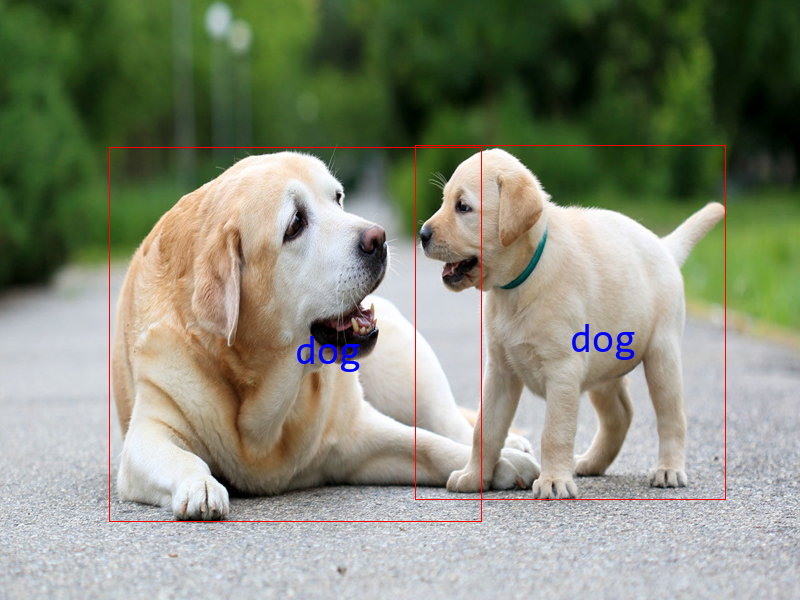

In [22]:
img_cp = img.copy()
drawImage(img_cp,pred_logits,pred_boxes,40)
img_cp

In [110]:
# test another local image

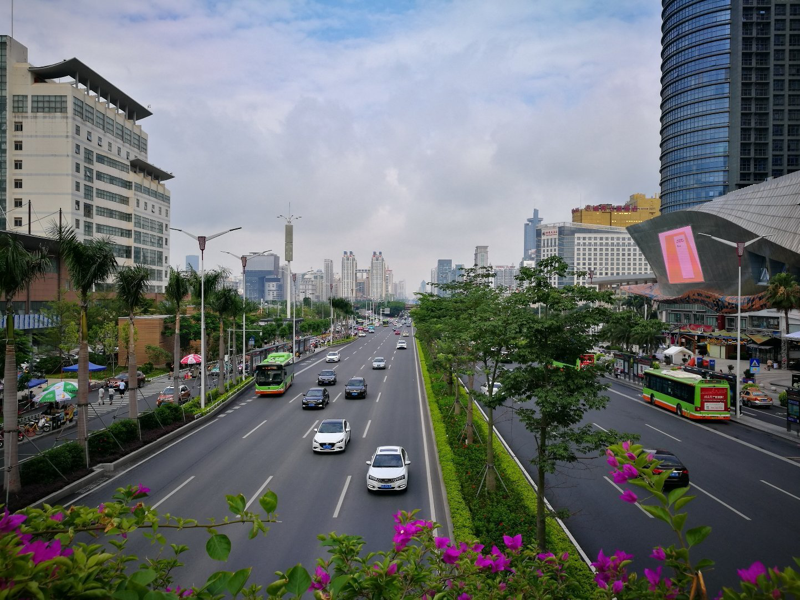

In [121]:
img2 = Image.open('test.jpg').resize((800,600))
img2

In [141]:
img_tensor2 = transform(img2).unsqueeze(0)

In [209]:
with t.no_grad():
    output2 = model(img_tensor2)

In [192]:
pred_boxes2 = output2['pred_boxes'][0]
pred_logits2 = output2['pred_logits'][0]

box 1: tensor([186.6941, 382.4934,  13.8894,  15.6292])
box 2: tensor([376.1848, 361.3272,  15.3558,  14.6750])
box 3: tensor([238.2848, 367.7125,  11.8269,  17.3334])
box 4: tensor([753.9016, 393.1071,  29.7523,  25.5000])
box 5: tensor([792.1405, 406.0225,  15.4525,  45.0983])
box 6: tensor([774.2905, 363.7674,  13.0006,  17.2346])
box 7: tensor([377.3406, 359.4747,  15.5601,  13.2603])
box 8: tensor([329.9199, 367.1908,  17.9830,  16.9341])
box 9: tensor([130.0691, 383.8439,  11.6060,  16.0789])
box 10: tensor([274.3852, 370.8492,  37.7832,  42.9514])
box 11: tensor([ 56.2345, 388.6695,  46.5656,  25.5956])
box 12: tensor([619.7953, 367.2695,  10.9779,  18.9515])
box 13: tensor([316.7757, 395.4498,  29.0752,  22.1742])
box 14: tensor([713.4901, 363.5719,  17.2638,  21.3383])
box 15: tensor([329.4405, 433.6387,  43.1021,  36.6447])
box 16: tensor([ 55.4496, 416.4945,  15.2585,  23.1833])
box 17: tensor([117.9657, 384.3727,  12.5407,  16.6809])
box 18: tensor([757.2097, 368.6143,  10.

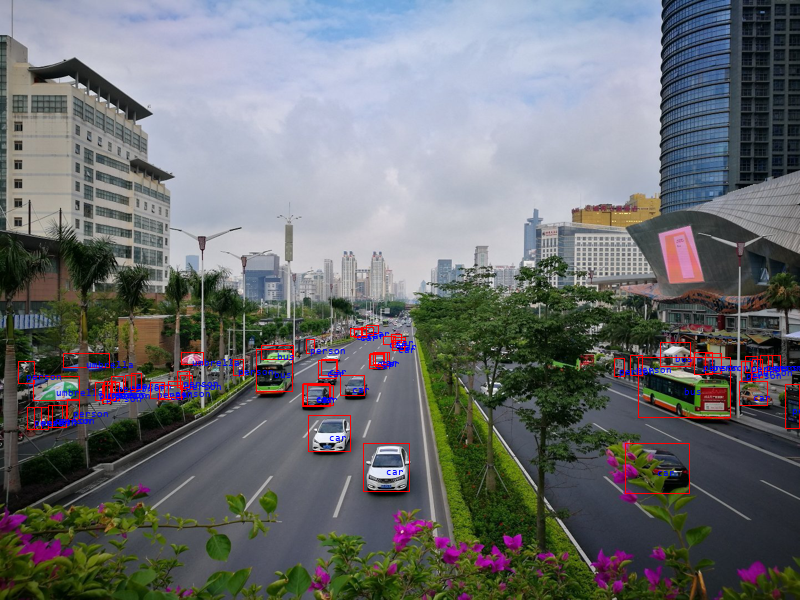

In [193]:
img2_cp = img2.copy()
drawImage(img2_cp, pred_logits2, pred_boxes2, 10)
img2_cp

In [229]:
"""
Let's try removing the last predicted class, so as to force the model to make a prediction 
when it doesn't detect anything. Also normalize the remaining predicted classes use softmax.
"""
pred_boxes3 = output2['pred_boxes'][0]
pred_logits3 = output2['pred_logits'][0][:,:len(CLASSES)]

max_output = pred_logits3.softmax(-1).max(-1)
topk_output = max_output.values.topk(30)  # find the top k predicted classes
topk_output

torch.return_types.topk(
values=tensor([0.9986, 0.9983, 0.9981, 0.9977, 0.9976, 0.9965, 0.9961, 0.9956, 0.9948,
        0.9944, 0.9940, 0.9928, 0.9925, 0.9911, 0.9876, 0.9858, 0.9844, 0.9801,
        0.9773, 0.9691, 0.9689, 0.9669, 0.9667, 0.9633, 0.9620, 0.9596, 0.9593,
        0.9591, 0.9571, 0.9545]),
indices=tensor([23, 55, 48, 56, 50, 62, 15, 19, 84,  7, 71, 17, 34,  1, 89, 86, 45, 60,
        66, 65, 69, 18, 81, 98,  6, 58, 47, 88, 80, 24]))

In [230]:
# filter from the logits and boxes where these top predictions are
pred_boxes3_filter = pred_boxes3[topk_output.indices]
pred_logits3_filter = pred_logits3[topk_output.indices]
pred_logits3_filter.shape

torch.Size([30, 91])

object 1: label:car,box:tensor([329.4405, 433.6387,  43.1021,  36.6447])
object 2: label:car,box:tensor([316.7178, 394.1105,  27.4546,  22.0013])
object 3: label:car,box:tensor([657.2638, 468.6792,  65.3721,  50.7536])
object 4: label:car,box:tensor([386.8608, 467.0583,  46.8957,  48.3507])
object 5: label:car,box:tensor([352.3903, 385.4458,  24.2788,  21.6100])
object 6: label:car,box:tensor([327.3060, 369.0230,  19.3732,  18.5998])
object 7: label:bus,box:tensor([274.3852, 370.8492,  37.7832,  42.9514])
object 8: label:car,box:tensor([316.7757, 395.4498,  29.0752,  22.1742])
object 9: label:car,box:tensor([382.2092, 359.7762,  15.0991,  14.1942])
object 10: label:car,box:tensor([377.3406, 359.4747,  15.5601,  13.2603])
object 11: label:bus,box:tensor([684.3922, 387.5017,  93.9225,  60.1519])
object 12: label:umbrella,box:tensor([ 56.2345, 388.6695,  46.5656,  25.5956])
object 13: label:person,box:tensor([746.9728, 371.9600,  11.7341,  21.5287])
object 14: label:car,box:tensor([376.18

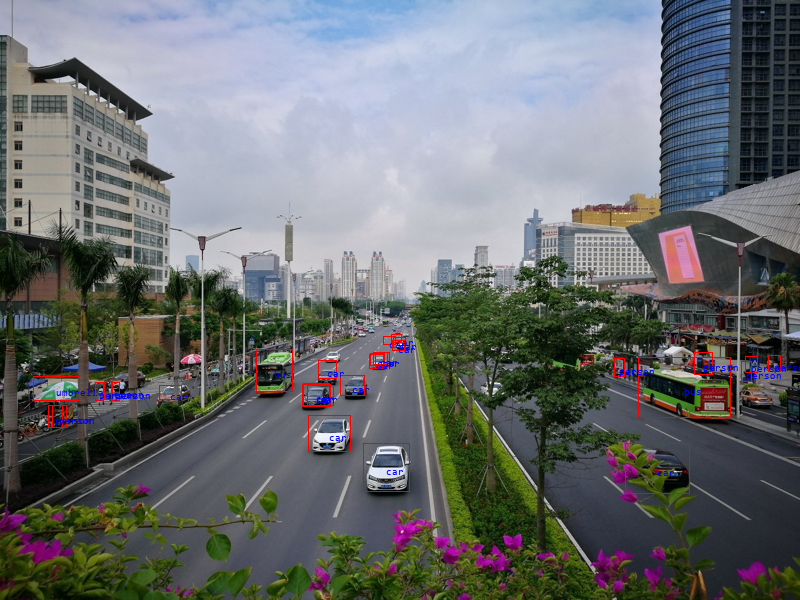

In [231]:
img2_cp = img2.copy()
drawImage(img2_cp, pred_logits3_filter, pred_boxes3_filter, 10)
img2_cp